# Математическая статистика
## Практическое задание 5

В данном задании предлагается провести некоторое исследование модели линейной регрессии и критериев для проверки статистических гипотез, в частности применить этим модели к реальным данным.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 5"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `5.N.ipynb` и `5.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 7 баллов
* Задача 2 - 2 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 2 балла
* Задача 5<font size="5" color="red">\*</font> - 10 баллов
* Задача 6 - 5 баллов
* Задача 7 - 4 балла
* Задача 8<font size="5" color="red">\*</font> - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 10 баллов

## 1. Линейная регрессия

**Задача 1.** По шаблону напишите класс, реализующий линейную регрессию. Интерфейс этого класса в некоторой степени соответствует классу <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`LinearRegression`</a> из библиотеки `sklearn`.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
import numpy.linalg as la

МНК-оценка: $\hat\theta = (Z^T Z)^{-1} Z^T X$


Несмещенная оценка для $\sigma^2$: $\hat\sigma^2 = \frac{1}{n-k} || X - Z\hat\theta||^2$


Доверительные интервалы для коэффициентов (матрица размера k x 2): $\left( (\hat\theta_i - u_{\frac{1 + \alpha}{2}}\sqrt{a_{i,i}\hat\sigma^2}, \hat\theta_i - u_{\frac{1 - \alpha}{2}}\sqrt{a_{i,i}\hat\sigma^2}) \right) $, $a_i$ -- элементы матрицы $(Z^T Z)^{-1}$

In [4]:
class LinearRegression:
    def __init__(self):
        super()
        
    def fit(self, X, Y, alpha=0.95):
        ''' Обучение модели. Предполагается модель Y = X * theta + epsilon, 
            где X --- регрессор, Y --- отклик,
            а epsilon имеет нормальное распределение с параметрами (0, sigma^2 * I_n).
            alpha --- уровень доверия для доверительного интервала.
        '''
        
        self.n, self.k = X.shape
        
        self.theta = la.inv((np.transpose(X) @ X)) @ np.transpose(X) @ Y
        self.sigma_sq = np.sum((Y - X @ self.theta) ** 2) / (self.n - self.k)
        self.conf_int = []
        ZTZ = lin.inv(np.transpose(X) @ X)
        for i in range(self.k):
            temp = np.sqrt(ZTZ[i][i] * self.sigma_sq)
            a1 = self.theta[i] - temp * sps.t(df=(self.n - self.k)).ppf((1 + alpha) / 2)
            a2 = self.theta[i] - temp * sps.t(df=(self.n - self.k)).ppf((1 - alpha) / 2)
            self.conf_int.append([a1, a2])
        self.conf_int = np.array(self.conf_int)
         
        return self
    
    def summary(self):
        print('Linear regression on %d features and %d examples' % (self.k, self.n))
        print('Sigma: %.6f' % self.sigma_sq)
        print('\t\tLower\t\tEstimation\tUpper')
        for j in range(self.k):
            print('theta_%d:\t%.6f\t%.6f\t%.6f' % (j, self.conf_int[j, 0], 
                                                   self.theta[j], self.conf_int[j, 1]))
        
    def predict(self, X):
        ''' Возвращает предсказание отклика на новых объектах X. '''
        
        Y_pred = X @ self.theta
        return Y_pred

Загрузите данные о потреблении мороженного в зависимости от температуры воздуха и цены (файл `ice_cream.txt`).
Примените реализованный выше класс линейной регрессии к этим данным предполагая, что модель имеет вид $ic = \theta_1 + \theta_2\ t$, где $t$ --- температура воздуха (столбец `temp`), $ic$ --- постребление мороженного в литрах на человека (столбец `IC`).
Значения температуры предварительно переведите из Фаренгейта в Цельсий [(Фаренгейт — 32) / 1,8 = Цельсий].

К обученной модели примените фунцию `summary` и постройте график регрессии, то есть график прямой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t$, где $\widehat{\theta}_1, \widehat{\theta}_2$ --- МНК-оценки коэффициентов.
На график нанесите точки выборки.
Убедитесь, что построейнный график совпадает с графиком из презентации с первой лекции, правда, с точностью до значений температура (она была неправильно переведена из Фаренгейта в Цельсий).

In [135]:
data = []
with open("ice_cream.txt", "r") as file:
    for line in file:
        pieces_first = line.split('\n')
        pieces_second = pieces_first[0].split('\t')
        if (pieces_second[0] != 'date'):
            data.append(np.array(list(map(lambda x: float(x), pieces_second))))

In [34]:
ft = []
ic = []
for i in range(len(data)):
    ft.append(np.array([1, (data[i][4] - 32) / 1.8]))
    
for i in range(len(data)):
    ic.append(data[i][1])


lin_reg = LinearRegression()
lin_reg.fit(X=np.array(ft), Y=np.array(ic))
lin_reg.summary()

Linear regression on 2 features and 30 examples
Sigma: 0.001786
		Lower		Estimation	Upper
theta_0:	0.283276	0.306298	0.329319
theta_1:	0.003831	0.005593	0.007355


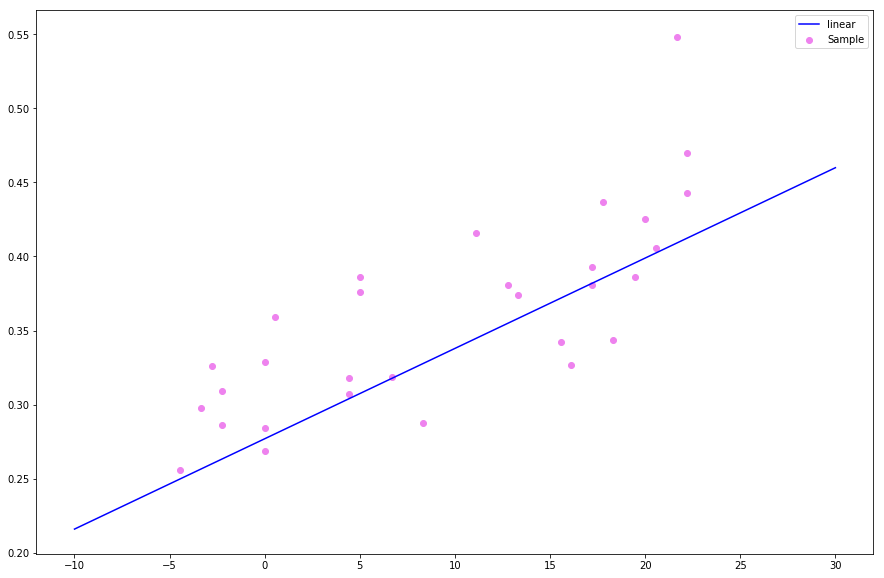

In [38]:
plt.figure(figsize=(15, 10))
grid = np.linspace(-10, 30, 300)
plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[1] * grid, color='blue', label='linear')
plt.scatter(np.array(ft)[:, 1], ic, color = 'violet', label='Sample')
plt.legend()
plt.show()

По графику видно, что прямая описывает выборку (хотя и есть выбросы).

Теперь учтите влияние года (столбец `Year`) для двух случаев:
* модель $ic = \theta_1 + \theta_2\ t + \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{1\ год\}, y_2 = I\{2\ год\}$. Поясните, почему нельзя рассмативать одну переменную $y$ --- номер года.
* для каждого года рассматривается своя линейная зависимость $ic = \theta_1 + \theta_2\ t$.

В каждом случае нарисуйте графики. Отличаются ли полученные результаты? От чего это зависит? Как зависит потребление мороженного от года? 

1) модель $ic = \theta_1 + \theta_2\ t + \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{1\ год\}, y_2 = I\{2\ год\}$.

In [37]:
ft = []
for i in range(len(data)):
    if data[i][6] == 0:
        ft.append(np.array([1,  (data[i][4] - 32) / 1.8, 0, 0]))
    elif data[i][6] == 1:
        ft.append(np.array([1,  (data[i][4] - 32) / 1.8, 1, 0]))
    elif data[i][6] == 2:
        ft.append(np.array([1,  (data[i][4] - 32) / 1.8, 0, 1]))
        
lin_reg.fit(X=np.array(ft), Y=ic)
lin_reg.summary()

Linear regression on 4 features and 30 examples
Sigma: 0.001016
		Lower		Estimation	Upper
theta_0:	0.251176	0.277050	0.302923
theta_1:	0.004741	0.006095	0.007449
theta_2:	-0.011237	0.016491	0.044218
theta_3:	0.041535	0.074307	0.107078


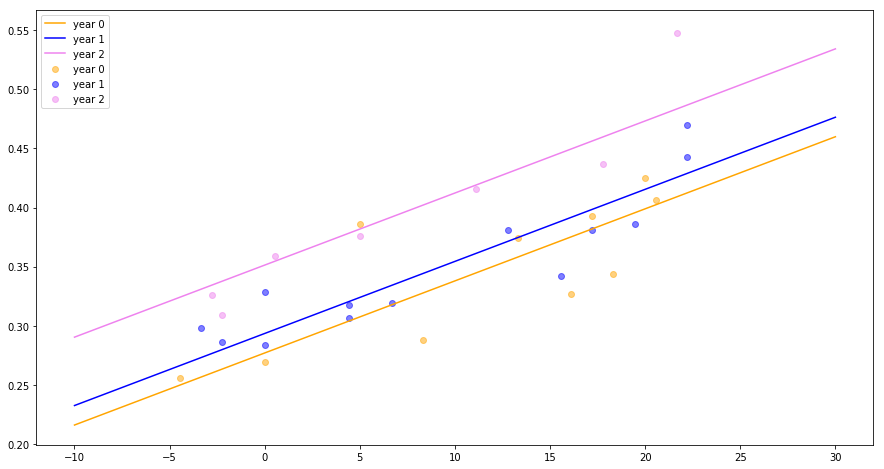

In [45]:
plt.figure(figsize=(15, 10))
grid = np.linspace(-10, 30, 300)
plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[1] * grid, color='orange', label='year 0')
plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[2] + lin_reg.theta[1] * grid, color='blue', label='year 1')
plt.plot(grid, lin_reg.theta[0] + lin_reg.theta[3] + lin_reg.theta[1] * grid, color='violet', label='year 2')
ft_all = [[], [], []]
ft2 = []
ft3 = []
ic_all = [[], [], []]
ic2 = []
ic3 = []
for i in range(len(data)):
    ic_all[int(data[i][6])].append(data[i][1])
    ft_all[int(data[i][6])].append((data[i][4] - 32) / 1.8)

plt.scatter(ft_all[0], ic_all[0], color='orange', alpha=0.5, label='year 0')
plt.scatter(ft_all[1], ic_all[1], color='blue', alpha=0.5, label='year 1')
plt.scatter(ft_all[2], ic_all[2], color='violet', alpha=0.5, label='year 2')
plt.legend()
plt.show()

2) для каждого года рассматривается своя линейная зависимость $ic = \theta_1 + \theta_2\ t$.

In [49]:
ic_all, ft_all = [[], [], []], [[], [], []]
lin_reg1 = LinearRegression()
lin_reg2 = LinearRegression()
lin_reg3 = LinearRegression()
for i in range(len(data)):
    ic_all[int(data[i][6])].append(data[i][1])
    ft_all[int(data[i][6])].append(np.array([1, (data[i][4] - 32) / 1.8]))

lin_reg1.fit(X=np.array(ft_all[0]), Y=np.array(ic_all[0]))
lin_reg2.fit(X=np.array(ft_all[1]), Y=np.array(ic_all[1]))
lin_reg3.fit(X=np.array(ft_all[2]), Y=np.array(ic_all[2]))

print("\nFor year 0:")
lin_reg1.summary()

print("\nFor year 1:")
lin_reg2.summary()

print("\nFor year 2:")
lin_reg3.summary()


For year 0:
Linear regression on 2 features and 10 examples
Sigma: 0.001597
		Lower		Estimation	Upper
theta_0:	0.236963	0.286405	0.335846
theta_1:	0.001787	0.005277	0.008767

For year 1:
Linear regression on 2 features and 13 examples
Sigma: 0.000667
		Lower		Estimation	Upper
theta_0:	0.274993	0.297426	0.319859
theta_1:	0.003935	0.005672	0.007409

For year 2:
Linear regression on 2 features and 7 examples
Sigma: 0.000766
		Lower		Estimation	Upper
theta_0:	0.303805	0.338346	0.372886
theta_1:	0.004907	0.007877	0.010846


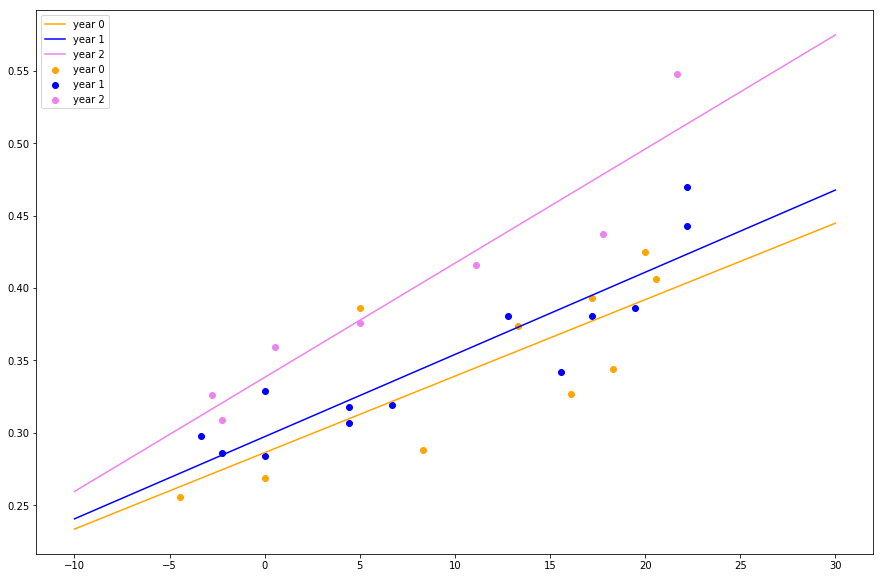

In [53]:
plt.figure(figsize=(15, 10))
grid = np.linspace(-10, 30, 300)
plt.plot(grid, lin_reg1.theta[0] + lin_reg1.theta[1] * grid, color='orange', label='year 0')
plt.plot(grid, lin_reg2.theta[0] + lin_reg2.theta[1] * grid, color='blue',  label='year 1')
plt.plot(grid, lin_reg3.theta[0] + lin_reg3.theta[1] * grid, color='violet', label='year 2')


plt.scatter(np.array(ft_all[0])[:, 1], ic_all[0], color='orange', label='year 0')
plt.scatter(np.array(ft_all[1])[:, 1], ic_all[1], color='blue', label='year 1')
plt.scatter(np.array(ft_all[2])[:, 1], ic_all[2], color='violet', label='year 2')
plt.legend()
plt.show()

По графикам видно, что в зависимости от обучения по всем годам или по каждому году в отдельности получаются разные результаты (это логично, т.к. в первом случае мы рассматривали всю выборку, а во втором только ее части). Так, в первом случае все прямые параллельны, а во втором имеют разный наклон (при этом видно, что во 2 год потребляли больше мороженого)

Наконец, обучите модель на предсказание потребления мороженного в зависимости от всех переменных.
Не забудьте, что для года нужно ввести две переменных.
Для полученной модели выведите `summary`.

In [58]:
lin_reg = LinearRegression()
a = []
for i in range(len(data)):
    mass = []
    for j in range(len(data[i])):
        if j != 1:
            mass.append(data[i][j])
    if data[i][5] == 0 or data[i][5] == 1:
        mass.append(0)
    else:
        mass.append(1)
    a.append(mass)

lin_reg.fit(X= np.array(a), Y=np.array(ic))
lin_reg.summary()

Linear regression on 7 features and 30 examples
Sigma: 0.000636
		Lower		Estimation	Upper
theta_0:	-0.006770	-0.002924	0.000922
theta_1:	-0.078189	0.723376	1.524941
theta_2:	0.000106	0.002587	0.005069
theta_3:	0.000355	0.001887	0.003419
theta_4:	0.000148	0.001632	0.003116
theta_5:	-0.011464	0.036906	0.085275
theta_6:	-0.349304	-0.224804	-0.100304


Но это еще не все.
Постройте теперь линейную регрессию для модели $ic = \theta_1 + \theta_2\ t + \theta_3\ t^2 + \theta_4\ t^3$.
Выведите для нее summary и постройте график предсказания, то есть график кривой $ic = \widehat{\theta}_1 + \widehat{\theta}_2\ t + \widehat{\theta}_3\ t^2 + \widehat{\theta}_4\ t^3$. Хорошие ли получаются результаты?

In [60]:
ft = []
for i in range(len(data)):
    ft.append((data[i][4] - 32) / 1.8)
ft = np.array(ft)
ft = ft.reshape(ft.shape[0], 1)
ft_all = np.hstack([ft ** 0, ft, ft ** 2, ft ** 3])
lin_reg = LinearRegression()
lin_reg.fit(X=ft_all, Y=np.array(ic))
lin_reg.summary()

Linear regression on 4 features and 30 examples
Sigma: 0.001529
		Lower		Estimation	Upper
theta_0:	0.295294	0.319902	0.344510
theta_1:	0.000388	0.007200	0.014013
theta_2:	-0.001861	-0.000855	0.000152
theta_3:	0.000002	0.000038	0.000073


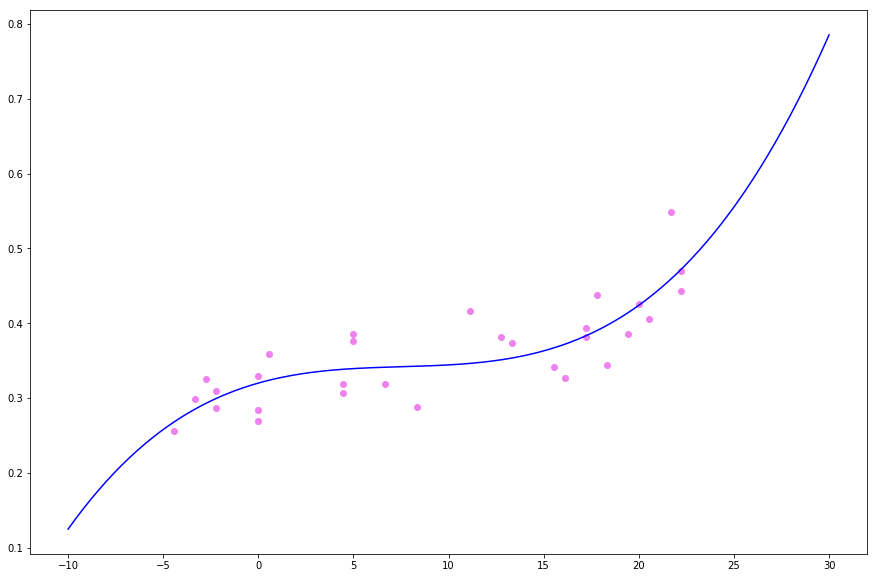

In [62]:
plt.figure(figsize=(15, 10))
grid = np.linspace(-10, 30, 300)
plt.plot(grid, 
         lin_reg.theta[0] + lin_reg.theta[1] * grid + lin_reg.theta[2] * grid ** 2 + lin_reg.theta[3] * grid ** 3,
         color='blue')
plt.scatter(ft, ic, color='violet')
plt.show()

Да, по графику видно, что кривая хорошо описывает выборку.

Чтобы понять, почему так происходит, выведите значения матрицы $(X^T X)^{-1}$ для данной матрицы и посчитайте для нее индекс обусловленности $\sqrt{\left.\lambda_{max}\right/\lambda_{min}}$, где $\lambda_{max}, \lambda_{min}$ --- максимальный и минимальный собственные значения матрицы $X^T X$. Собственные значения можно посчитать функцией <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigvals.html">`scipy.linalg.eigvals`</a>.

Прокомментируйте полученные результаты. Помочь в этом может следующая <a href="https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%BE_%D0%BE%D0%B1%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8">статья</a>.

In [64]:
eigvals = lin.eigvals(lin.inv(np.transpose(data) @ data))
print(np.sqrt(max(eigvals) / min(eigvals)))

8382.06873968


Индекс обусловленности получился большим. Согласно статье, это говорит о том, что оператор плохо обусловлен, то есть погрешности решения будут больше относительно погрешностей в условии.

**Задача 2.** В данной задаче нужно реализовать функцию отбора признаков для линейной регрессии. Иначе говоря, пусть есть модель $y = \theta_1 x_1 + ... + \theta_k x_k$. Нужно определить, какие $\theta_j$ нужно положить равными нулю, чтобы качество полученной модели было максимальным.

Для этого имеющиеся данные нужно случайно разделить на две части --- обучение и тест (train и test). На первой части нужно обучить модель регресии, взяв некоторые из признаков, то есть рассмотреть модель $y = \theta_{j_1} x_{j_1} + ... + \theta_{j_s} x_{j_s}$. По второй части нужно посчитать ее качество --- среднеквадратичное отклонение (mean squared error) предсказания от истинного значения отклика, то есть величину
$$MSE = \sum\limits_{i \in test} \left(\widehat{y}(x_i) - Y_i\right)^2,$$
где $x_i = (x_{i,1}, ..., x_{i,k})$, $Y_i$ --- отклик на объекте $x_i$, а $\widehat{y}(x)$ --- оценка отклика на объекте $x$.

Если $k$ невелико, то подобным образом можно перебрать все поднаборы признаков и выбрать наилучший по значению MSE.

Для выполнения задания воспользуйтесь следующими функциями:
* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression">`sklearn.linear_model.LinearRegression`</a>
--- реализация линейной регрессии. В данной реализации свободный параметр $\theta_1$ по умолчанию автоматически включается в модель. Отключить это можно с помощью `fit_intercept=False`, но это не нужно. *В данной задаче требуется, чтобы вы воспользовались готовой реализацией линейной регрессии, а не своей. Ведь на практике важно уметь применять готовые реализации, а не писать их самостоятельно.*

* <a href="http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html">`sklearn.cross_validation.train_test_split`</a>
--- функция разбиения данных на train и test. Установите параметр `test_size=0.3`.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">`sklearn.metrics.mean_squared_error`</a>
--- реализация MSE.

Для перебора реализуйте функцию.

In [ ]:
from sklearn.linear_model import LinearRegression

def best_features(X_train, X_test, Y_train, Y_test):
    mses = []  # сюда записывайте значения MSE
    k = X_train.shape[1]

    for j in range(1, 2 ** k):  # номер набора признаков
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]  # набор признаков
        
        mse = ...  # MSE для данного набора признаков
        mses.append(mse)
        
    # Печать 10 лучших наборов
    print('mse\t features')
    mses = np.array(mses)
    best_numbres = np.argsort(mses)[:10]
    for j in best_numbres:
        mask = np.array([j & (1 << s) for s in range(k)], dtype=bool)
        features_numbers = np.arange(k)[mask]
        print('%.3f\t' % mses[j], features_numbers)

Примените реализованный отбор признаков к датасетам
* <a href="http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics">Yacht Hydrodynamics</a> --- для парусных яхт нужно оценить остаточное сопротивление на единицу массы смещения (последний столбец) в зависимости от различных характеристик яхты.

* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston">Boston Housing Prices</a> --- цены на дома в Бостоне в зависимости от ряда особенностей.

**Задача 3<font size="5" color="red">\*</font>.** Загрузите <a href="http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt">датасет</a>, в котором показана зависимость веса мозга от веса туловища для некоторых видов млекопитающих. Задача состоит в том, чтобы подобрать по этим данным хорошую модель регрессии. Для этого, можно попробовать взять некоторые функции от значения веса туловища, например, степенную, показательную, логарифмическую. Можно также сделать преобразование значений веса мозга, например, прологарифмировать. Кроме того, можно разбить значения веса туловища на несколько частей и на каждой части строить свою модель линейной регрессии.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Какой вывод можно сделать?

$\sigma^2 \geq \frac{n(\overline{X} - a)^2}{z^2_{\frac{1 + \alpha_1}{2}}}$,$\frac{n S^2}{u_{p_1}} \leq \sigma^2 \leq \frac{n S^2}{u_{p_2}}$
где $u_{\alpha}$ -- квантиль $\chi_{n-1}^2$, а $z_{\alpha}$ -- квантиль $\mathcal{N}(0, 1)$, при этом $\alpha_1 \alpha_2 = \alpha$, $p_2 - p_1 = \alpha_2$.

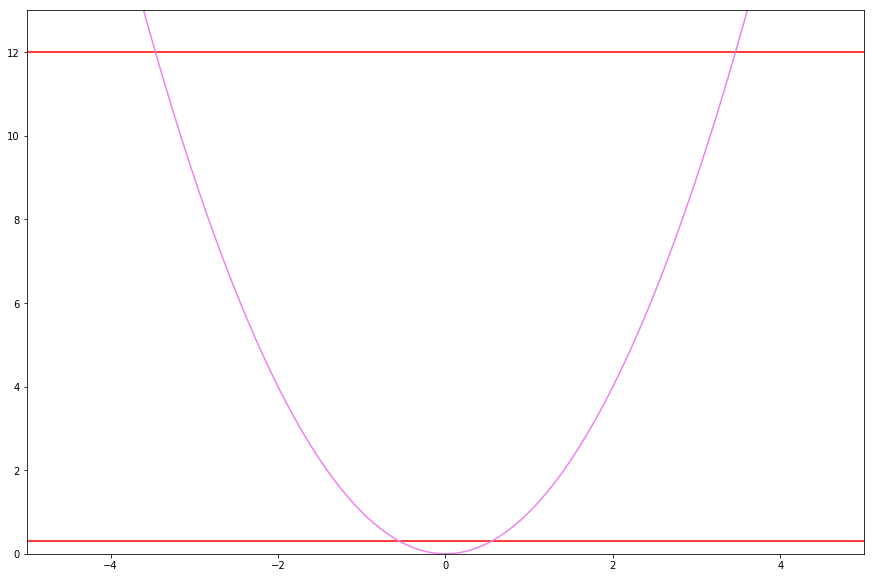

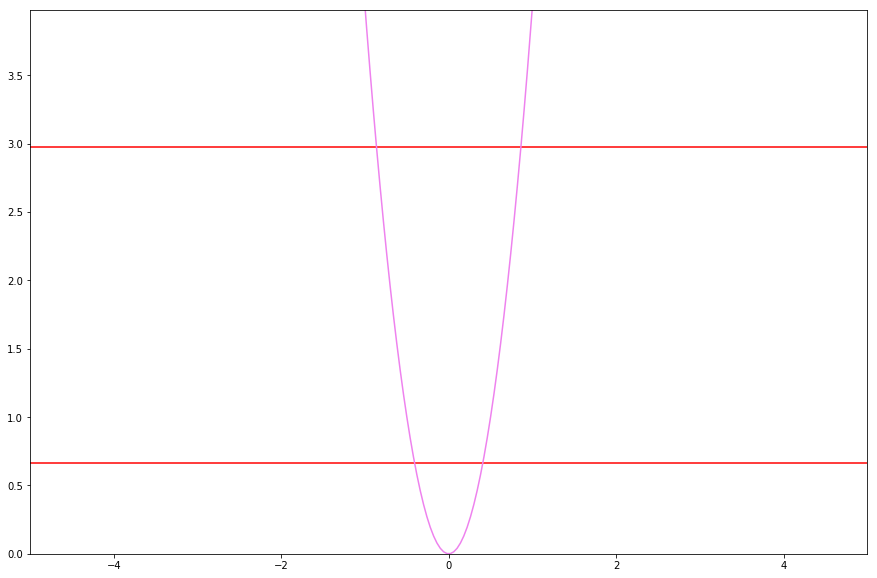

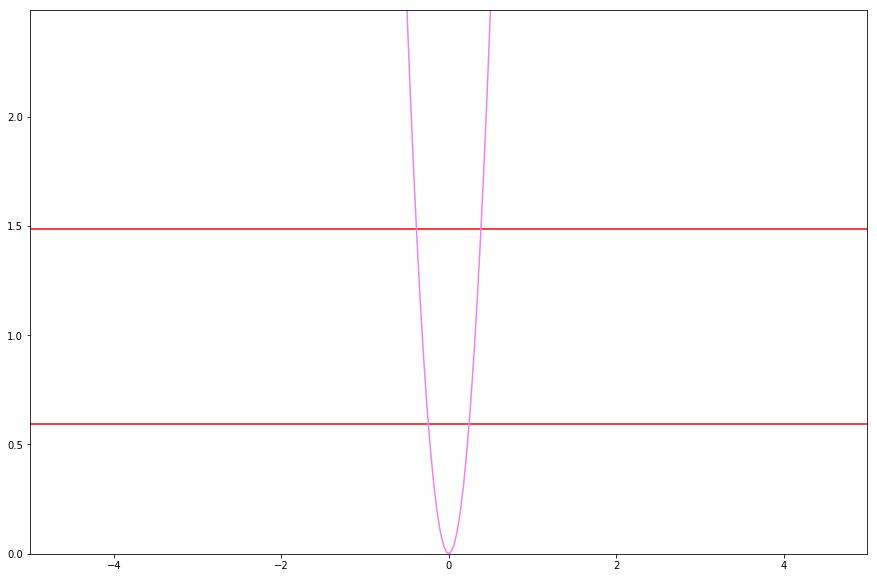

In [84]:
alpha = 0.95
for size in [5, 20, 50]:
    plt.figure(figsize=(15,10))
    grid = np.linspace(-20, 20, 1000)
    sample = sps.norm.rvs(size=size)
    sp = [size * (grid.mean() - i) ** 2 / sps.norm.ppf((1 + np.sqrt(alpha)) / 2) ** 2 for i in grid]
    plt.plot(grid, sp, color='violet')
    sq = np.mean(sample ** 2) - np.mean(sample) ** 2
    u1, u2 = sps.chi2.interval(alpha / np.sqrt(alpha), size - 1)
    plt.hlines(size * sq / u2, -5, 5, color='red')
    plt.hlines(size * sq / u1, -5, 5, color='red')
    plt.xlim(-5,5)
    plt.ylim(0, size * sq / u1 + 1)
    plt.show()

По графикам видно, что доверительная область уменьшается с увеличением выборки (площадь пересечения красных линий с графиком -- доверительная область).

**Задача 5<font size="5" color="red">\*</font>.** 
Пусть дана линейная гауссовская модель $Y = X\theta + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, \beta^{-1}I_n)$.
Пусть $\theta$ имеет априорное распределение $\mathcal{N}(0, \alpha^{-1}I_k)$. 
Такая постановка задачи соответствует Ridge-регрессии.
Оценкой параметров будет математическое ожидание по апостериорному распределению, аналогично можно получить доверительный интервал.
Кроме того, с помощью апостериорного распределения можно получить доверительный интервал для отклика на новом объекте, а не только точечную оценку.

Реализуйте класс RidgeRegression подобно классу LinearRegression, но добавьте в него так же возможность получения доверительного интервала для отклика на новом объекте.
Примените модель к некоторых датасетам, которые рассматривались в предыдущих задачах.
Нарисуйте графики оценки отклика на новом объекте и доверительные интервалы для него.

## 2. Проверка статистических гипотез

**Задача 6.** 
Существует примета, что если перед вам дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 
Пусть $X_1, ..., X_n \sim Bern(p)$ --- проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ --- неизвестная вероятность такого события. 
Нужно проверить гипотезу $H_0: p=1/2$ (отсутствие связи между черным котом и неудачей) против альтернативы $H_1: p>1/2$ (неудача происходит чаще если черный кот перебегает дорогу).

Известно, что $S = \left\{T(X) > c_\alpha\right\}$, где $T(X) = \sum X_i$, является равномерно наиболее мощным критерием для данной задачи. 
Чему при этом равно $c_\alpha$?
При этом p-value в данной задаче определяется как $p(t) = \mathsf{P}_{0.5}(T(X) > t)$, где $t = \sum x_i$ --- реализация статистики $T(X)$.

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы.

Пользуйтесь функциями из `scipy.stats`, про которые подробно написано в файле `python_5`. Внимательно проверьте правильность строгих и нестрогих знаков.

$c_{\alpha}$ - это $(1 - \alpha)$-квантиль распределения $Bin(n, \theta)$, т.к. наша $T(X)$ -- сумма величин, имеющих распределение $Bern(\frac{1}{2})$ (т.к. у нас события независимы), то есть сама имеет распределение $Bin(n, \theta)$.

In [96]:
alpha=0.05
print("T(X)\tP(t)\tc_alpha")
for size in [5, 10, 15, 20, 50, 100]:
    sample = sps.bernoulli(p=0.5).rvs(size=size)
    T = sample.sum()
    c_a = sps.binom(size, 0.5).ppf(1-alpha)
    p = sps.binom(size, 0.5).sf(T)
    print(T, "\t%.2f" % p, "\t", c_a)


T(X)	P(t)	c_alpha
3 	0.19 	 4.0
2 	0.95 	 8.0
7 	0.50 	 11.0
6 	0.94 	 14.0
21 	0.84 	 31.0
47 	0.69 	 58.0


При уровне значимости 0.05 гипотеза не отвергается.

Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 
Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 - отвергается ли $H_0$ (выводите 1, если отвергается).
Какие выводы можно сделать?

In [116]:
for i in range(10):
    print("T(X) \t P(t) \t c_alpha \t H0 отвергается?")
    for n, p in [(5, 0.75), (10 ** 5, 0.51)]:
        sample = sps.bernoulli(p=p).rvs(size=n)
        T = sample.sum()
        c_a = sps.binom(n=n, p=0.5).ppf(1 - alpha)
        p = sps.binom(n=n, p=0.5).sf(T)
        print(T, "\t%.2f" % p, "\t", c_a, "\t\t" if (n==5) else "\t", "1" if (p <= alpha) else 0)
    print("\n")

T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
3 	0.19 	 4.0 		 0
51105 	0.00 	 50260.0 	 1


T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
3 	0.19 	 4.0 		 0
50657 	0.00 	 50260.0 	 1


T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
4 	0.03 	 4.0 		 1
50883 	0.00 	 50260.0 	 1


T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
3 	0.19 	 4.0 		 0
51067 	0.00 	 50260.0 	 1


T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
2 	0.50 	 4.0 		 0
51206 	0.00 	 50260.0 	 1


T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
5 	0.00 	 4.0 		 1
51032 	0.00 	 50260.0 	 1


T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
5 	0.00 	 4.0 		 1
50797 	0.00 	 50260.0 	 1


T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
4 	0.03 	 4.0 		 1
51155 	0.00 	 50260.0 	 1


T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
2 	0.50 	 4.0 		 0
50836 	0.00 	 50260.0 	 1


T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
5 	0.00 	 4.0 		 1
51215 	0.00 	 50260.0 	 1




При $n=5$ видно, что гипотеза $H_0$ отвергается не всегда, а когда получается большая разница со средним значением статистики (в данной ситуации $H_0$ отверглась в случае $T(X) = 2, 3$).
При $n=10^5$ получается, что даже незначительный отход от среднего значения статистики приводит к отверганию гипотезы.

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.
Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.
Сделайте вывод.

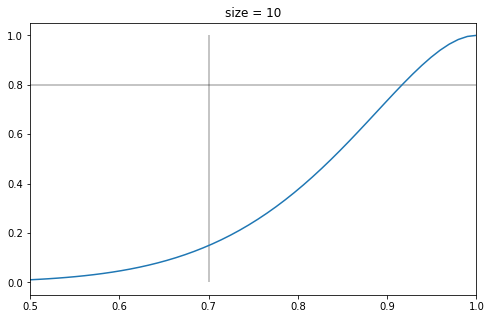

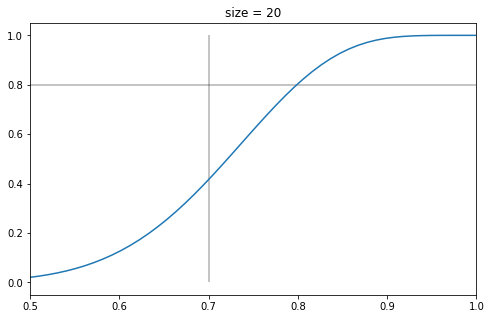

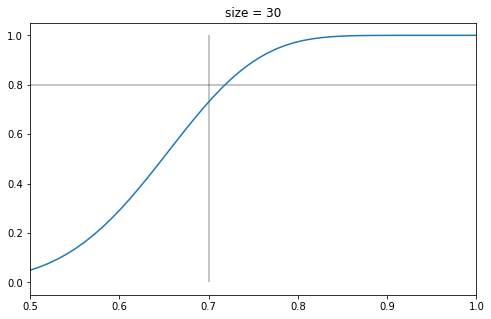

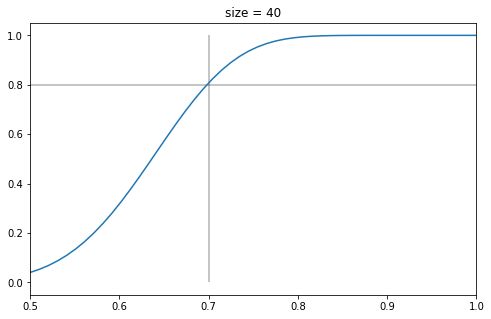

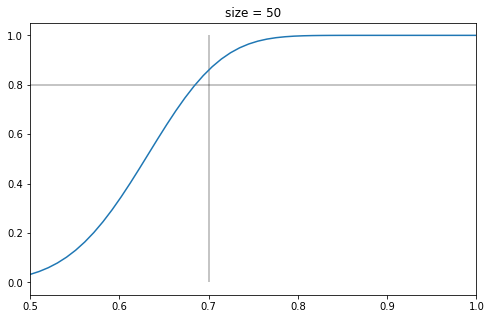

In [163]:
p = 0.7
beta = 0.8
alpha = 0.05


for size in [10, 20, 30, 40, 50]:
    grid = np.linspace(0.5, 1, 50)
    plt.figure(figsize=(8, 5))
    plt.plot(grid, sps.binom.sf(sps.binom(n=size, p=0.5).ppf(1 - alpha), n=size, p=grid))
    plt.hlines(beta, 0.5, 1, alpha=0.3)
    plt.vlines(p, 0, 1, alpha=0.3)
    plt.xlim(0.5, 1)
    plt.title("size = %d" % size)
    plt.show()

По графикам видно, что $n^*=40$.

In [168]:
for i in range(10):
    print("T(X) \t P(t) \t c_alpha \t H0 отвергается?")
    for n, p in [(40, 0.51), (40, 0.9)]:
        sample = sps.bernoulli(p=p).rvs(size=n)
        T = sample.sum()
        c_a = sps.binom(n=n, p=0.5).ppf(1 - alpha)
        p = sps.binom(n=n, p=0.5).sf(T)
        print(T, "\t%.2f" % p, "\t", c_a, "\t\t", "1" if (p <= alpha) else 0)

T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
22 	0.21 	 25.0 		 0
38 	0.00 	 25.0 		 1
T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
24 	0.08 	 25.0 		 0
36 	0.00 	 25.0 		 1
T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
21 	0.32 	 25.0 		 0
34 	0.00 	 25.0 		 1
T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
22 	0.21 	 25.0 		 0
38 	0.00 	 25.0 		 1
T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
19 	0.56 	 25.0 		 0
39 	0.00 	 25.0 		 1
T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
23 	0.13 	 25.0 		 0
39 	0.00 	 25.0 		 1
T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
18 	0.68 	 25.0 		 0
38 	0.00 	 25.0 		 1
T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
19 	0.56 	 25.0 		 0
38 	0.00 	 25.0 		 1
T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
20 	0.44 	 25.0 		 0
39 	0.00 	 25.0 		 1
T(X) 	 P(t) 	 c_alpha 	 H0 отвергается?
23 	0.13 	 25.0 		 0
36 	0.00 	 25.0 		 1


Видно, что теперь гипотеза принимается при $\frac{1}{2} < p < p^*$ и отвергается при $p > p^*$.

### Справка для выполнения следующих задач

**Критерий согласия хи-квадрат**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare>`scipy.stats.chisquare`</a>`(f_obs, f_exp=None, ddof=0)`

`f_obs` --- число элементов выборки, попавших в каждый из интервалов

`f_exp` --- ожидаемое число элементов выборки (по умолчанию равномерное)

`ddof` --- поправка на число степеней свободы. Статистика асимптотически будет иметь распределение хи-квадрат с числом степеней свободы $k - 1 - ddof$, где $k$ --- число интервалов.

Возвращает значение статистики критерия и соответствующее p-value.

**Критерий согласия Колмогорова**

<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest>`scipy.stats.kstest`</a>`(rvs, cdf, args=())`

`rvs` --- выборка

`cdf` --- функция распределения (сама функция или ее название)

`args` --- параметры распределения

Возвращает значение статистики критерия и соответствующее p-value.

**Задача 7.**

* Проверьте, что ваша выборка значений скорости ветра из задания 2 действительно согласуется с распределением Вейбулла.

* Проверьте, что при больших $n$ распределение статистики из задач 3 и 4 задания 2 действительно хорошо приближают предельное распределение.

* Проверьте, что остатки в регрессии из задач выше нормальны.

* Подберите класс распределений для выборки количества друзей из задания 1.

Использовать можно два описанных выше критерия, либо любой другой критерий, если будет обоснована необходимость его применения в данной задаче, а так же будет приведено краткое описание критерия.
Уровень значимости взять равным 0.05.

**Задача 8<font size="5" color="red">\*</font>.** Проведите исследование согласно примеру 2 параграфа 2 главы 18 книги М.Б. Лагутина "Наглядная математическая статистика".

**Задача 9<font size="5" color="red">\*</font>.** 
Изучите Q-Q plot и критерий Шапиро-Уилка для проверки нормальности, напишите их теоретическое пояснение.
В изучении могут помочь материалы курса <a href="http://wiki.cs.hse.ru/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D0%BE%D0%B9_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85"> ПСАД</a>.

Постройте графики Q-Q plot для различных распределений и дайте к ним пояснение.
Проверьте различные данные на нормальность с помощью различных критериев и Q-Q plot.
Данные можно использовать из задачи 7 или какие-либо еще, например, отдельные компоненты из Ирисов Фишера.
Постарайтесь так же правильно контролировать вероятность общей ошибки первого рода.